# 정규화(원핫 인코딩 + 표준화)
## plant 데이터 prepocessing

In [1]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import module.preprosess as pr
pd.options.display.max_columns = 999

In [2]:
plant = pd.read_csv("data/31.finaldata_plant/plant.csv")
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_IN,MONTH,WEEK,HOUR
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-4.561169,4,13,0
1,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-4.222123,4,13,3
2,2016-04-01 06:00:00,1,1,13.00,33.00,10.00,6.00,56.00,2016-04-02 06:00:00,0.0,2016-04-03 06:00:00,0.0,-2.896847,4,13,6
3,2016-04-01 09:00:00,1,1,13.00,33.00,10.00,18.00,30.00,2016-04-02 09:00:00,0.0,2016-04-03 09:00:00,0.0,-2.896847,4,13,9
4,2016-04-01 12:00:00,1,1,16.00,28.00,10.00,18.00,20.00,2016-04-02 12:00:00,0.0,2016-04-03 12:00:00,0.0,-2.502215,4,13,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:00:00,2,3,8.29,37.82,9.53,4.72,50.98,2019-04-01 23:00:00,0.0,2019-04-02 23:00:00,0.0,-5.252838,3,13,23
349313,2019-03-31 23:10:00,2,3,8.26,38.34,9.57,4.72,52.11,2019-04-01 23:10:00,0.0,2019-04-02 23:10:00,0.0,-5.099800,3,13,23
349314,2019-03-31 23:20:00,2,3,8.29,38.92,9.60,4.66,51.01,2019-04-01 23:20:00,0.0,2019-04-02 23:20:00,0.0,-4.874884,3,13,23
349315,2019-03-31 23:30:00,2,3,8.32,39.13,9.49,4.57,51.47,2019-04-01 23:30:00,0.0,2019-04-02 23:30:00,0.0,-4.776917,3,13,23


## 정규화 할 list 나누기

In [5]:
dummy_list = ["MONTH","WEEK","HOUR"]
caling_list= ["DEW_POINT_IN"]

In [6]:
plant = pr.preprosess(plant, caling_list, dummy_list)
plant.head()

caling_category: ['TEM_IN', 'HUM_IN', 'TEM_COIL', 'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'DEW_POINT_IN']
dummy_category: ['PLANT', 'LOC', 'MONTH', 'WEEK', 'HOUR']


,MEA_DDHR,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,DEW_POINT_IN,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,WEEK_1,WEEK_2,WEEK_3,WEEK_4,WEEK_5,WEEK_6,WEEK_7,WEEK_8,WEEK_9,WEEK_10,WEEK_11,WEEK_12,WEEK_13,WEEK_14,WEEK_15,WEEK_16,WEEK_17,WEEK_18,WEEK_19,WEEK_20,WEEK_21,WEEK_22,WEEK_23,WEEK_24,WEEK_25,WEEK_26,WEEK_27,WEEK_28,WEEK_29,WEEK_30,WEEK_31,WEEK_32,WEEK_33,WEEK_34,WEEK_35,WEEK_36,WEEK_37,WEEK_38,WEEK_39,WEEK_40,WEEK_41,WEEK_42,WEEK_43,WEEK_44,WEEK_45,WEEK_46,WEEK_47,WEEK_48,WEEK_49,WEEK_50,WEEK_51,WEEK_52,HOUR_0,HOUR_1,HOUR_2,HOUR_3,HOUR_4,HOUR_5,HOUR_6,HOUR_7,HOUR_8,HOUR_9,HOUR_10,HOUR_11,HOUR_12,HOUR_13,HOUR_14,HOUR_15,HOUR_16,HOUR_17,HOUR_18,HOUR_19,HOUR_20,HOUR_21,HOUR_22,HOUR_23
0,2016-04-01 00:00:00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.948895,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2016-04-01 03:00:00,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.919136,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2016-04-01 06:00:00,2016-04-02 06:00:00,0.0,2016-04-03 06:00:00,0.0,-0.337508,-1.408192,-0.585582,-0.687689,-0.315511,-0.802814,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2016-04-01 09:00:00,2016-04-02 09:00:00,0.0,2016-04-03 09:00:00,0.0,-0.337508,-1.408192,-0.585582,0.395291,-1.699968,-0.802814,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2016-04-01 12:00:00,2016-04-02 12:00:00,0.0,2016-04-03 12:00:00,0.0,-0.036700,-1.768877,-0.585582,0.395291,-2.232452,-0.768177,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## test_data validation &정규화 preprosessing

In [8]:
test_data = pd.read_csv("data/31.finaldata_plant/test_data.csv")
test_data

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_IN,MONTH,WEEK,HOUR
0,2019-04-01 00:00:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,-4.482439,4,14,0
1,2019-04-01 04:30:00,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,-0.247107,4,14,4
2,2019-04-01 10:30:00,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,-3.163210,4,14,10
3,2019-04-01 11:00:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,-3.042714,4,14,11
4,2019-04-01 13:30:00,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,-9.291221,4,14,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,10.73,33.36,13.30,6.28,46.37,2020-03-30 03:00:00,NaN,2020-03-31 03:00:00,NaN,-4.745901,3,13,3
3535,2020-03-29 05:00:00,2,3,9.15,38.86,11.70,1.39,74.33,2020-03-30 05:00:00,NaN,2020-03-31 05:00:00,NaN,-4.125121,3,13,5
3536,2020-03-29 07:00:00,2,1,7.10,44.87,9.03,4.26,58.06,2020-03-30 07:00:00,NaN,2020-03-31 07:00:00,NaN,-4.064845,3,13,7
3537,2020-03-29 11:30:00,1,1,13.54,33.49,12.20,12.90,33.67,2020-03-30 11:30:00,NaN,2020-03-31 11:30:00,NaN,-2.224313,3,13,11


In [9]:
test = pr.preprosess(test_data,caling_list,dummy_list)
test.head()

caling_category: ['TEM_IN', 'HUM_IN', 'TEM_COIL', 'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'DEW_POINT_IN']
dummy_category: ['PLANT', 'LOC', 'MONTH', 'WEEK', 'HOUR']


,MEA_DDHR,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,DEW_POINT_IN,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,WEEK_1,WEEK_2,WEEK_3,WEEK_4,WEEK_5,WEEK_6,WEEK_7,WEEK_8,WEEK_9,WEEK_10,WEEK_11,WEEK_12,WEEK_13,WEEK_14,WEEK_15,WEEK_16,WEEK_17,WEEK_18,WEEK_19,WEEK_20,WEEK_21,WEEK_22,WEEK_23,WEEK_24,WEEK_25,WEEK_26,WEEK_27,WEEK_28,WEEK_29,WEEK_30,WEEK_31,WEEK_32,WEEK_33,WEEK_34,WEEK_35,WEEK_36,WEEK_37,WEEK_38,WEEK_39,WEEK_40,WEEK_41,WEEK_42,WEEK_43,WEEK_44,WEEK_45,WEEK_46,WEEK_47,WEEK_48,WEEK_49,WEEK_50,WEEK_51,WEEK_52,HOUR_0,HOUR_1,HOUR_2,HOUR_3,HOUR_4,HOUR_5,HOUR_6,HOUR_7,HOUR_8,HOUR_9,HOUR_10,HOUR_11,HOUR_12,HOUR_13,HOUR_14,HOUR_15,HOUR_16,HOUR_17,HOUR_18,HOUR_19,HOUR_20,HOUR_21,HOUR_22,HOUR_23
0,2019-04-01 00:00:00,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,-0.936761,-1.054636,-0.641253,-1.016510,-0.547359,-1.156985,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-04-01 04:30:00,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,-0.720865,-0.449353,-0.562858,-0.817131,-0.319514,-0.722579,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-04-01 10:30:00,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,-0.788188,-1.017843,-0.758277,-0.166248,-1.690616,-1.021676,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2019-04-01 11:00:00,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,-0.455058,-1.508418,-0.554905,-0.159918,-1.885695,-1.009317,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2019-04-01 13:30:00,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,-0.575774,-2.336624,-0.793497,-0.192621,-2.310636,-1.650210,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# 데이터 분류
## plant_train 데이터
### train, test 데이터 분리

In [11]:
timeList = ['MEA_DDHR', 'X24H_TMA', 'X48H_TMA']
plant = plant.drop(timeList, axis=1)


In [12]:
plant.head()

,X24H_COND_LOC,X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,DEW_POINT_IN,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,WEEK_1,WEEK_2,WEEK_3,WEEK_4,WEEK_5,WEEK_6,WEEK_7,WEEK_8,WEEK_9,WEEK_10,WEEK_11,WEEK_12,WEEK_13,WEEK_14,WEEK_15,WEEK_16,WEEK_17,WEEK_18,WEEK_19,WEEK_20,WEEK_21,WEEK_22,WEEK_23,WEEK_24,WEEK_25,WEEK_26,WEEK_27,WEEK_28,WEEK_29,WEEK_30,WEEK_31,WEEK_32,WEEK_33,WEEK_34,WEEK_35,WEEK_36,WEEK_37,WEEK_38,WEEK_39,WEEK_40,WEEK_41,WEEK_42,WEEK_43,WEEK_44,WEEK_45,WEEK_46,WEEK_47,WEEK_48,WEEK_49,WEEK_50,WEEK_51,WEEK_52,HOUR_0,HOUR_1,HOUR_2,HOUR_3,HOUR_4,HOUR_5,HOUR_6,HOUR_7,HOUR_8,HOUR_9,HOUR_10,HOUR_11,HOUR_12,HOUR_13,HOUR_14,HOUR_15,HOUR_16,HOUR_17,HOUR_18,HOUR_19,HOUR_20,HOUR_21,HOUR_22,HOUR_23
0,0.0,0.0,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.948895,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.919136,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,-0.337508,-1.408192,-0.585582,-0.687689,-0.315511,-0.802814,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,-0.337508,-1.408192,-0.585582,0.395291,-1.699968,-0.802814,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,-0.036700,-1.768877,-0.585582,0.395291,-2.232452,-0.768177,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [13]:
train_X = plant.drop(['X24H_COND_LOC', 'X48H_COND_LOC'], axis=1)
train24_y = plant[['X24H_COND_LOC']]
train48_y = plant[['X48H_COND_LOC']]

### 24시간 후 결로 예상 분류

In [14]:
from sklearn.model_selection import train_test_split
X_train24, X_val24, y_train24, y_val24 = train_test_split(train_X, train24_y, test_size=0.3, shuffle=True, random_state=42)

### 48시간 후 결로 예상 분류

In [15]:
from sklearn.model_selection import train_test_split
X_train48, X_val48, y_train48, y_val48 = train_test_split(train_X, train48_y, test_size=0.3, shuffle=True, random_state=42)

## test_data 만들기

In [16]:
timeList = ['MEA_DDHR', 'X24H_TMA', 'X48H_TMA']
test = test.drop(timeList, axis=1)
test_X = test.drop(['X24H_COND_LOC', 'X48H_COND_LOC'], axis=1)
test24_y = test[['X24H_COND_LOC']]
test48_y = test[['X48H_COND_LOC']]

# Random Forest
## 24 시간 결로 예측

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_model24 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model24.fit(X_train24, y_train24)

C:\Users\silen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [20]:
y_pred24 = rf_model24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104207
         1.0       0.97      0.64      0.77       589

    accuracy                           1.00    104796
   macro avg       0.98      0.82      0.88    104796
weighted avg       1.00      1.00      1.00    104796



In [21]:
imp_rf24_df = pd.DataFrame(data=np.c_[train_X.columns.values, rf_model24.feature_importances_], columns=['variable', 'importance'])
imp_rf24_df.sort_values(by='importance', ascending=False, inplace=True)

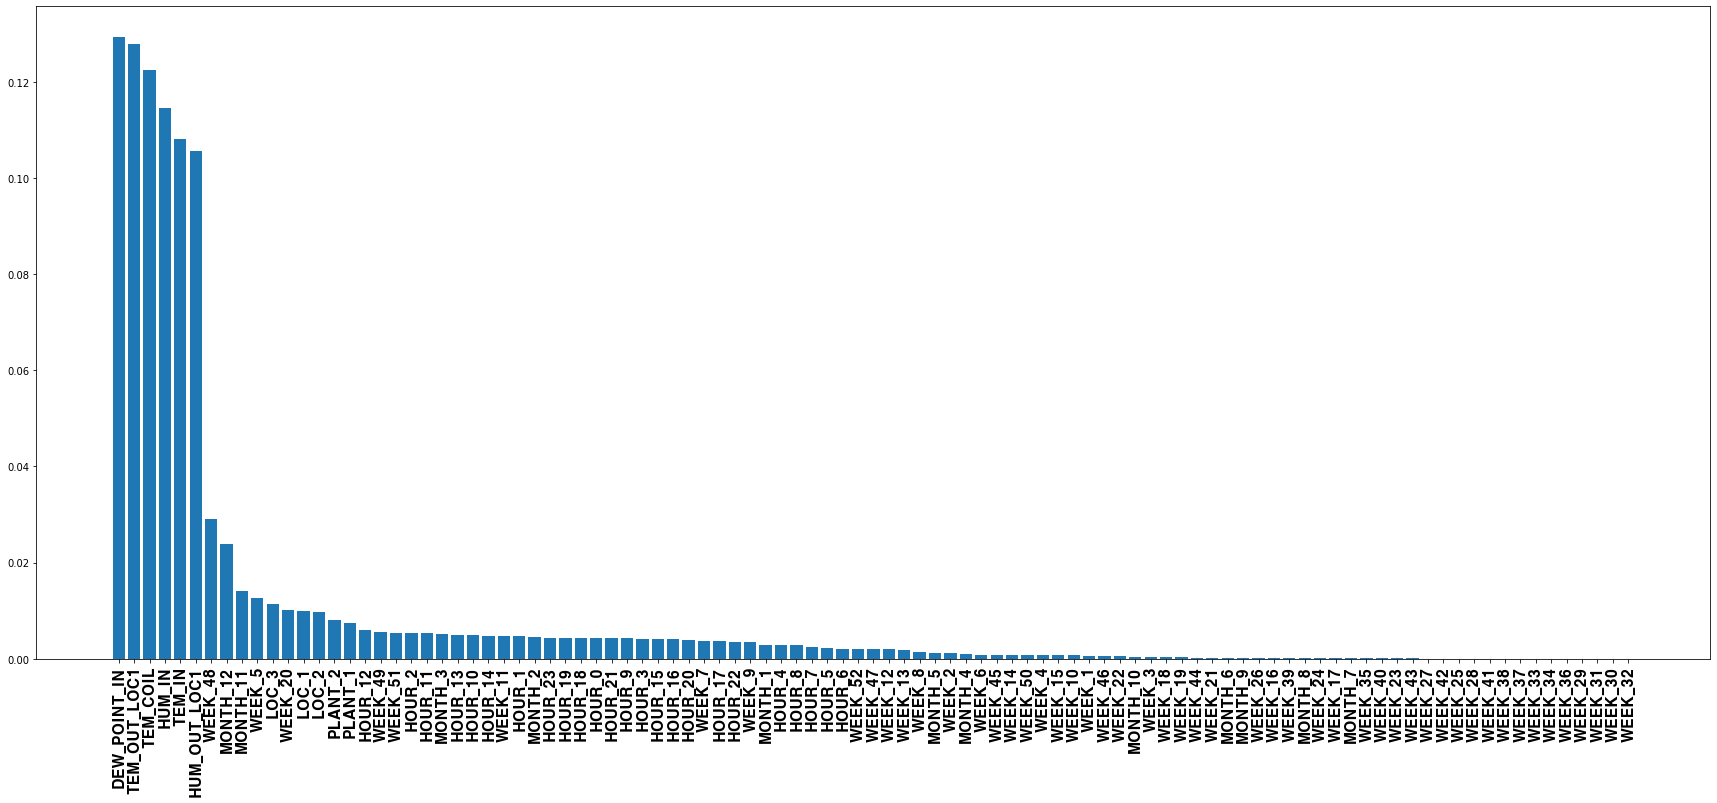

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(imp_rf24_df.variable, imp_rf24_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

## 48시간 결로 예측

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_model48 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model48.fit(X_train48, y_train48)

C:\Users\silen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [24]:
y_pred48 = rf_model48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104192
         1.0       0.96      0.57      0.71       604

    accuracy                           1.00    104796
   macro avg       0.98      0.78      0.86    104796
weighted avg       1.00      1.00      1.00    104796



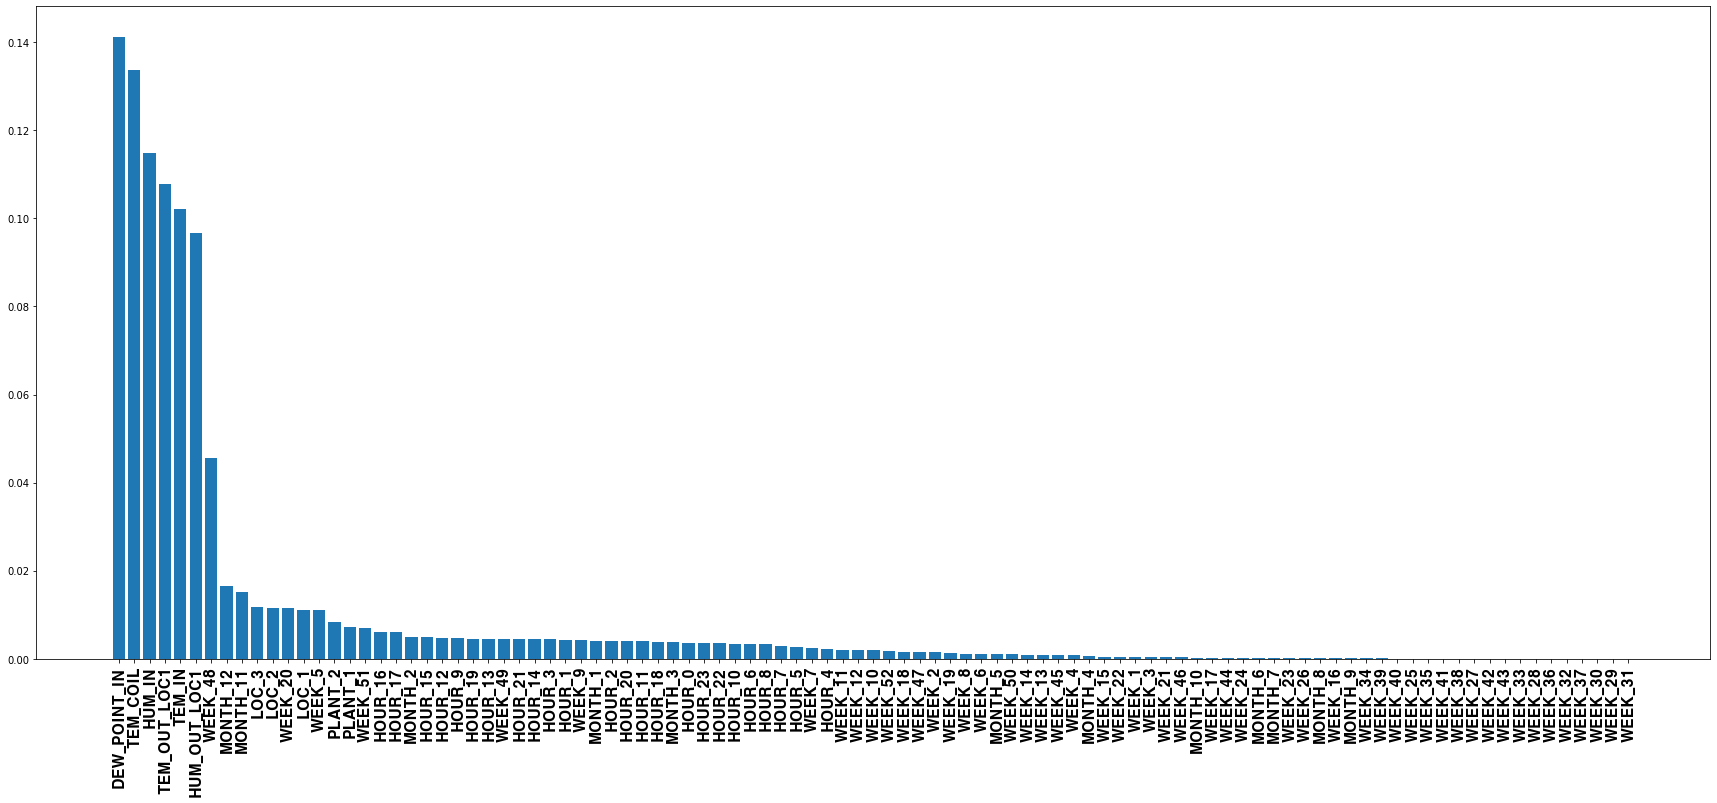

In [25]:
imp_rf48_df = pd.DataFrame(data=np.c_[train_X.columns.values, rf_model48.feature_importances_], columns=['variable', 'importance'])
imp_rf48_df.sort_values(by='importance', ascending=False, inplace=True)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(imp_rf48_df.variable, imp_rf48_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

## 검증값 만들기

In [26]:
test_data

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,MONTH,WEEK,HOUR
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,4,14,0
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,4,14,4
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,4,14,10
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,4,14,11
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,4,14,13
...,...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,NaN,2020-03-31 03:00:00,NaN,3,13,3
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,NaN,2020-03-31 05:00:00,NaN,3,13,5
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,NaN,2020-03-31 07:00:00,NaN,3,13,7
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,NaN,2020-03-31 11:30:00,NaN,3,13,11


In [27]:
import module.preprosess as pr
validation = pr.makeValiation(test_data,rf_model24, rf_model48, test_X)
validation

C:\Users\silen\Weather-Bigdata-Contest\Weather-Bigdata-Contest\module\preprosess.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\silen\Weather-Bigdata-Contest\Weather-Bigdata-Contest\module\preprosess.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\silen\Weather-Bigdata-Contest\Weather-Bigdata-Contest\module\preprosess.py:47: SettingWithCopyWarning: 
A value

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,0
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,0
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,2,2019-04-03 10:30:00,0,2
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,0
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,1,2019-04-03 13:30:00,0,1
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,0
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,0,2020-03-31 11:30:00,0,0


In [28]:
def findCondRow24(validation):
    data = validation.loc[validation["X24H_COND_LOC"] == 1]
    return data
def findCondRow48(validation):
    data = validation.loc[validation["X48H_COND_LOC"] == 1]
    return data    

In [29]:
pr.findCondRow(validation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
421,2019-05-15 12:30:00,2,1,2019-05-16 12:30:00,1,52,2019-05-17 12:30:00,0,3


In [30]:
pr.findCondRow(validation,48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB


In [31]:
pr.findCondRow(validation,1)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
421,2019-05-15 12:30:00,2,1,2019-05-16 12:30:00,1,52,2019-05-17 12:30:00,0,3


## 파일 저장하기

In [32]:
pr.save_validation_csv(validation,"rforest")

# LightGBM
## 24시간 결로 예측

In [33]:
from lightgbm import LGBMClassifier
lgbm_model24 = LGBMClassifier(n_estimators=100, random_state=42)
lgbm_model24.fit(X_train24, y_train24)

C:\Users\silen\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\silen\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [34]:
y_pred24 = lgbm_model24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104207
         1.0       0.66      0.66      0.66       589

    accuracy                           1.00    104796
   macro avg       0.83      0.83      0.83    104796
weighted avg       1.00      1.00      1.00    104796



## 48시간 결로 예측

In [35]:
from lightgbm import LGBMClassifier
lgbm_model48 = LGBMClassifier(n_estimators=100, random_state=42)
lgbm_model48.fit(X_train48, y_train48)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [36]:
y_pred48 = lgbm_model48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104192
         1.0       0.50      0.54      0.52       604

    accuracy                           0.99    104796
   macro avg       0.75      0.77      0.76    104796
weighted avg       0.99      0.99      0.99    104796



## 검증값 만들기

In [37]:
lgValiation =pr.makeValiation(test_data,lgbm_model24,lgbm_model48, test_X)
lgValiation

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,0
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,0
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,49,2019-04-03 10:30:00,0,0
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,0
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,3,2019-04-03 13:30:00,0,0
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,0
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,0,2020-03-31 11:30:00,0,0


In [38]:
pr.findCondRow(lgValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
25,2019-04-03 11:00:00,2,2,2019-04-04 11:00:00,1,74,2019-04-05 11:00:00,0,0
26,2019-04-03 11:30:00,1,2,2019-04-04 11:30:00,1,95,2019-04-05 11:30:00,0,0
411,2019-05-14 09:30:00,1,3,2019-05-15 09:30:00,1,98,2019-05-16 09:30:00,0,20
420,2019-05-15 11:30:00,1,3,2019-05-16 11:30:00,1,99,2019-05-17 11:30:00,0,0
421,2019-05-15 12:30:00,2,1,2019-05-16 12:30:00,1,99,2019-05-17 12:30:00,0,0
423,2019-05-15 13:30:00,1,3,2019-05-16 13:30:00,1,99,2019-05-17 13:30:00,0,0
424,2019-05-15 14:00:00,1,3,2019-05-16 14:00:00,1,99,2019-05-17 14:00:00,1,100
2032,2019-11-19 03:30:00,2,1,2019-11-20 03:30:00,1,99,2019-11-21 03:30:00,0,0
2113,2019-11-26 23:00:00,1,3,2019-11-27 23:00:00,1,100,2019-11-28 23:00:00,0,0
2114,2019-11-26 23:00:00,1,2,2019-11-27 23:00:00,1,100,2019-11-28 23:00:00,0,0


In [39]:
pr.findCondRow(lgValiation,48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
375,2019-05-10 09:30:00,2,2,2019-05-11 09:30:00,0,0,2019-05-12 09:30:00,1,99
424,2019-05-15 14:00:00,1,3,2019-05-16 14:00:00,1,99,2019-05-17 14:00:00,1,100
573,2019-06-01 17:00:00,2,3,2019-06-02 17:00:00,0,0,2019-06-03 17:00:00,1,100
1735,2019-10-12 06:30:00,1,3,2019-10-13 06:30:00,0,0,2019-10-14 06:30:00,1,100
1943,2019-11-15 21:00:00,1,2,2019-11-16 21:00:00,0,0,2019-11-17 21:00:00,1,92
1944,2019-11-15 21:00:00,1,3,2019-11-16 21:00:00,0,0,2019-11-17 21:00:00,1,99
1945,2019-11-15 21:30:00,1,2,2019-11-16 21:30:00,0,0,2019-11-17 21:30:00,1,92
1946,2019-11-15 21:30:00,1,3,2019-11-16 21:30:00,0,0,2019-11-17 21:30:00,1,99
1979,2019-11-16 21:30:00,1,2,2019-11-17 21:30:00,0,0,2019-11-18 21:30:00,1,90
2142,2019-12-01 02:30:00,2,3,2019-12-02 02:30:00,0,0,2019-12-03 02:30:00,1,99


In [40]:
pr.findCondRow(lgValiation,1)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
25,2019-04-03 11:00:00,2,2,2019-04-04 11:00:00,1,74,2019-04-05 11:00:00,0,0
26,2019-04-03 11:30:00,1,2,2019-04-04 11:30:00,1,95,2019-04-05 11:30:00,0,0
375,2019-05-10 09:30:00,2,2,2019-05-11 09:30:00,0,0,2019-05-12 09:30:00,1,99
411,2019-05-14 09:30:00,1,3,2019-05-15 09:30:00,1,98,2019-05-16 09:30:00,0,20
420,2019-05-15 11:30:00,1,3,2019-05-16 11:30:00,1,99,2019-05-17 11:30:00,0,0
421,2019-05-15 12:30:00,2,1,2019-05-16 12:30:00,1,99,2019-05-17 12:30:00,0,0
423,2019-05-15 13:30:00,1,3,2019-05-16 13:30:00,1,99,2019-05-17 13:30:00,0,0
424,2019-05-15 14:00:00,1,3,2019-05-16 14:00:00,1,99,2019-05-17 14:00:00,1,100
573,2019-06-01 17:00:00,2,3,2019-06-02 17:00:00,0,0,2019-06-03 17:00:00,1,100
1735,2019-10-12 06:30:00,1,3,2019-10-13 06:30:00,0,0,2019-10-14 06:30:00,1,100


## 파일 저장하기

In [41]:
pr.save_validation_csv(lgValiation,"lgbm")

# XGBOOST
## 24시간 결로 예측

In [42]:
from xgboost import XGBClassifier
xgb_model24 = XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=100, random_state=42)
xgb_model24.fit(X_train24, y_train24)

C:\Users\silen\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\silen\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [43]:
y_pred24 = xgb_model24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104207
         1.0       0.88      0.55      0.67       589

    accuracy                           1.00    104796
   macro avg       0.94      0.77      0.84    104796
weighted avg       1.00      1.00      1.00    104796



## 48시간 결로 예측

In [44]:
from xgboost import XGBClassifier
xgb_model48 = XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=100, random_state=42)
xgb_model48.fit(X_train48, y_train48)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [45]:
y_pred48 = xgb_model48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104192
         1.0       0.83      0.50      0.63       604

    accuracy                           1.00    104796
   macro avg       0.91      0.75      0.81    104796
weighted avg       1.00      1.00      1.00    104796



## 검증 값 만들기

In [46]:
xgValiation=pr.makeValiation(test_data,xgb_model24,xgb_model48,test_X)
xgValiation

C:\Users\silen\Weather-Bigdata-Contest\Weather-Bigdata-Contest\module\preprosess.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\silen\Weather-Bigdata-Contest\Weather-Bigdata-Contest\module\preprosess.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\silen\Weather-Bigdata-Contest\Weather-Bigdata-Contest\module\preprosess.py:47: SettingWithCopyWarning: 
A value

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,18,2019-04-03 00:00:00,0,18
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,18,2019-04-03 04:30:00,0,18
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,18,2019-04-03 10:30:00,0,20
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,18,2019-04-03 11:00:00,0,18
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,18,2019-04-03 13:30:00,0,20
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,18,2020-03-31 03:00:00,0,18
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,18,2020-03-31 05:00:00,0,18
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,18,2020-03-31 07:00:00,0,18
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,18,2020-03-31 11:30:00,0,18


In [47]:
pr.findCondRow(xgValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
411,2019-05-14 09:30:00,1,3,2019-05-15 09:30:00,1,59,2019-05-16 09:30:00,0,20
412,2019-05-14 10:00:00,2,1,2019-05-15 10:00:00,1,50,2019-05-16 10:00:00,0,28
420,2019-05-15 11:30:00,1,3,2019-05-16 11:30:00,1,68,2019-05-17 11:30:00,0,19
421,2019-05-15 12:30:00,2,1,2019-05-16 12:30:00,1,62,2019-05-17 12:30:00,0,19
423,2019-05-15 13:30:00,1,3,2019-05-16 13:30:00,1,75,2019-05-17 13:30:00,0,18
424,2019-05-15 14:00:00,1,3,2019-05-16 14:00:00,1,69,2019-05-17 14:00:00,0,18


In [48]:
pr.findCondRow(xgValiation,48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
2064,2019-11-22 16:00:00,1,2,2019-11-23 16:00:00,0,18,2019-11-24 16:00:00,1,50
2069,2019-11-22 17:00:00,1,2,2019-11-23 17:00:00,0,18,2019-11-24 17:00:00,1,51
3310,2020-03-06 12:30:00,2,1,2020-03-07 12:30:00,0,19,2020-03-08 12:30:00,1,60


In [49]:
pr.findCondRow(xgValiation,1)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
411,2019-05-14 09:30:00,1,3,2019-05-15 09:30:00,1,59,2019-05-16 09:30:00,0,20
412,2019-05-14 10:00:00,2,1,2019-05-15 10:00:00,1,50,2019-05-16 10:00:00,0,28
420,2019-05-15 11:30:00,1,3,2019-05-16 11:30:00,1,68,2019-05-17 11:30:00,0,19
421,2019-05-15 12:30:00,2,1,2019-05-16 12:30:00,1,62,2019-05-17 12:30:00,0,19
423,2019-05-15 13:30:00,1,3,2019-05-16 13:30:00,1,75,2019-05-17 13:30:00,0,18
424,2019-05-15 14:00:00,1,3,2019-05-16 14:00:00,1,69,2019-05-17 14:00:00,0,18
2064,2019-11-22 16:00:00,1,2,2019-11-23 16:00:00,0,18,2019-11-24 16:00:00,1,50
2069,2019-11-22 17:00:00,1,2,2019-11-23 17:00:00,0,18,2019-11-24 17:00:00,1,51
3310,2020-03-06 12:30:00,2,1,2020-03-07 12:30:00,0,19,2020-03-08 12:30:00,1,60


## 파일 저장하기

In [50]:
pr.save_validation_csv(xgValiation,"xgboost")

# KNN
## 24시간 결로 예측

In [51]:
from sklearn.neighbors import KNeighborsClassifier
neigh24 = KNeighborsClassifier(n_neighbors=3)
neigh24.fit(X_train24, y_train24)

C:\Users\silen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [52]:
y_pred24 = neigh24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104207
         1.0       0.74      0.50      0.60       589

    accuracy                           1.00    104796
   macro avg       0.87      0.75      0.80    104796
weighted avg       1.00      1.00      1.00    104796



## 48시간 결로 예측

In [53]:
from sklearn.neighbors import KNeighborsClassifier
neigh48 = KNeighborsClassifier(n_neighbors=3)
neigh48.fit(X_train48, y_train48)

C:\Users\silen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [54]:
y_pred48 = neigh48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104192
         1.0       0.70      0.47      0.56       604

    accuracy                           1.00    104796
   macro avg       0.85      0.73      0.78    104796
weighted avg       1.00      1.00      1.00    104796



## 검증값 만들기

In [55]:
knnValiation=pr.makeValiation(test_data,neigh24,neigh48,test_X)
knnValiation

C:\Users\silen\Weather-Bigdata-Contest\Weather-Bigdata-Contest\module\preprosess.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\silen\Weather-Bigdata-Contest\Weather-Bigdata-Contest\module\preprosess.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\silen\Weather-Bigdata-Contest\Weather-Bigdata-Contest\module\preprosess.py:47: SettingWithCopyWarning: 
A value

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,0
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,0
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,0,2019-04-03 10:30:00,0,0
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,0
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,0,2019-04-03 13:30:00,0,0
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,0
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,0,2020-03-31 11:30:00,0,0


In [56]:
pr.findCondRow(knnValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
420,2019-05-15 11:30:00,1,3,2019-05-16 11:30:00,1,66,2019-05-17 11:30:00,1,66
423,2019-05-15 13:30:00,1,3,2019-05-16 13:30:00,1,66,2019-05-17 13:30:00,1,66
444,2019-05-17 13:00:00,1,1,2019-05-18 13:00:00,1,66,2019-05-19 13:00:00,0,0
445,2019-05-17 13:00:00,1,3,2019-05-18 13:00:00,1,66,2019-05-19 13:00:00,1,66
446,2019-05-17 13:30:00,2,1,2019-05-18 13:30:00,1,66,2019-05-19 13:30:00,0,0
457,2019-05-19 03:30:00,1,3,2019-05-20 03:30:00,1,66,2019-05-21 03:30:00,0,0
2111,2019-11-26 17:30:00,1,2,2019-11-27 17:30:00,1,66,2019-11-28 17:30:00,0,0
2389,2019-12-17 14:00:00,1,3,2019-12-18 14:00:00,1,66,2019-12-19 14:00:00,0,0
3425,2020-03-19 02:30:00,1,3,2020-03-20 02:30:00,1,100,2020-03-21 02:30:00,0,0
3447,2020-03-22 02:00:00,1,2,2020-03-23 02:00:00,1,66,2020-03-24 02:00:00,0,0


In [58]:
pr.findCondRow(knnValiation,48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
420,2019-05-15 11:30:00,1,3,2019-05-16 11:30:00,1,66,2019-05-17 11:30:00,1,66
423,2019-05-15 13:30:00,1,3,2019-05-16 13:30:00,1,66,2019-05-17 13:30:00,1,66
438,2019-05-17 01:30:00,2,2,2019-05-18 01:30:00,0,0,2019-05-19 01:30:00,1,66
445,2019-05-17 13:00:00,1,3,2019-05-18 13:00:00,1,66,2019-05-19 13:00:00,1,66
456,2019-05-19 03:00:00,2,2,2019-05-20 03:00:00,0,0,2019-05-21 03:00:00,1,66
815,2019-06-27 12:30:00,1,3,2019-06-28 12:30:00,0,0,2019-06-29 12:30:00,1,66
2087,2019-11-23 16:00:00,1,2,2019-11-24 16:00:00,0,0,2019-11-25 16:00:00,1,66
2090,2019-11-23 16:30:00,1,2,2019-11-24 16:30:00,0,0,2019-11-25 16:30:00,1,100
2092,2019-11-23 17:00:00,1,2,2019-11-24 17:00:00,0,0,2019-11-25 17:00:00,1,66
2143,2019-12-01 09:30:00,1,3,2019-12-02 09:30:00,0,33,2019-12-03 09:30:00,1,66


In [60]:
pr.findCondRow(knnValiation,1)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
420,2019-05-15 11:30:00,1,3,2019-05-16 11:30:00,1,66,2019-05-17 11:30:00,1,66
423,2019-05-15 13:30:00,1,3,2019-05-16 13:30:00,1,66,2019-05-17 13:30:00,1,66
438,2019-05-17 01:30:00,2,2,2019-05-18 01:30:00,0,0,2019-05-19 01:30:00,1,66
444,2019-05-17 13:00:00,1,1,2019-05-18 13:00:00,1,66,2019-05-19 13:00:00,0,0
445,2019-05-17 13:00:00,1,3,2019-05-18 13:00:00,1,66,2019-05-19 13:00:00,1,66
446,2019-05-17 13:30:00,2,1,2019-05-18 13:30:00,1,66,2019-05-19 13:30:00,0,0
456,2019-05-19 03:00:00,2,2,2019-05-20 03:00:00,0,0,2019-05-21 03:00:00,1,66
457,2019-05-19 03:30:00,1,3,2019-05-20 03:30:00,1,66,2019-05-21 03:30:00,0,0
815,2019-06-27 12:30:00,1,3,2019-06-28 12:30:00,0,0,2019-06-29 12:30:00,1,66
2087,2019-11-23 16:00:00,1,2,2019-11-24 16:00:00,0,0,2019-11-25 16:00:00,1,66


## 파일 저장하기

In [61]:
pr.save_validation_csv(xgValiation,"knn")